In [93]:
import pandas as pd
import matplotlib.pyplot as plt

In [119]:
data = pd.read_csv('sanpham.csv')
data_temp = data.drop(data.index[range(20,len(data))])
data_week = data.drop(data.index[range(20)])
data_week =data_week.reset_index(drop=True)
data_week.head()

,ten san pham,total_count,Date
0,"Bao Tay Chơi Game ff, Pubg, Liên Quân.... Găng...",39337,Monday
1,Quạt tản nhiệt điện thoại sò lạnh MEMO DL05/FL...,20941,Monday
2,Miếng dán dẻo skin PPF tự phục hồi tr...,2466,Monday
3,"Bộ lau giấy lau màn hình điện thoại, ipad, kín...",1373,Monday
4,Tai nghe Bluetooth AMOI F9 TWS 5.0 bản QUỐC TẾ...,9783,Monday


In [120]:
def convert(list):
      
    # Converting integer list to string list
    # and joining the list using join()
    res = int("".join(map(str, list)))
      
    return res

In [121]:
#product_count_temp = data['total_count'][:20].values

# monday 
product_monday = data_week.loc[data_week['Date'] == 'Monday']
product_revenues = product_count_temp - product_monday['total_count'].values
list_monday_product = product_revenues.tolist()
sum_product_monday = int(product_revenues.sum())

# tuesday 
product_tuesday = data_week.loc[data_week['Date'] == 'Tuesday']
product_revenues = product_monday['total_count'].values - product_tuesday['total_count'].values
list_tuesday_product = product_revenues.tolist()
sum_product_tuesday = int(product_revenues.sum())

totals = [sum_product_monday,sum_product_tuesday]
totals

[1306, 1044]

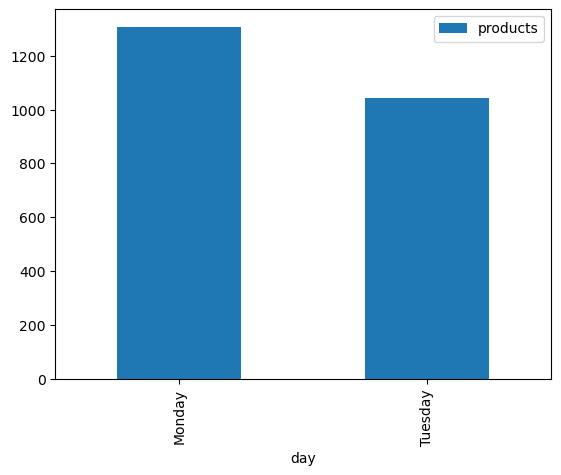

In [122]:
# graph 
from datetime import timedelta, date
from collections import defaultdict
from datetime import datetime
def daterange(date1, date2):
    for n in range(int ((date2 - date1).days)+1):
        yield date1 + timedelta(n)

start_dt = date(2022,10,9)
end_dt = date(2022,10,15)
list_weekend = [dt.strftime("%Y-%m-%d") for dt in daterange(start_dt, end_dt)]
daydate=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
daydates=['Monday', 'Tuesday']
res = dict(zip(daydate, list_weekend))
graph =  {'day': daydates,
        'products': totals}
df = pd.DataFrame(graph,columns=['day','products'])
df.plot(x ='day', y='products',kind = 'bar')
plt.show()